# Lesson 12: EDA

In [20]:
import logging # crea una bitacora de incidencias de nuestro script
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
logger = logging.getLogger()
logger.setLevel(logging.INFO) 

In [2]:
url = ('https://gist.githubusercontent.com/teamtom/' + 
       '1af7b484954b2d4b7e981ea3e7a27f24/raw/' + 
       '114fb69dce56b4462a9c3a417e7402330616ad4f/' + 
       'titanic_full.csv')
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  746 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df_raw.sample(10, random_state=2025)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
308,3,0,Cribb Mr. John Hatfield,male,44.0,0,1,371362,16.1000,NaN,S,NaN,NaN,Bournemouth England Newark NJ
311,3,0,Badt Mr. Mohamed,male,40.0,0,0,2623,7.2250,NaN,C,NaN,NaN,NaN
391,3,0,Andreasson Mr. Paul Edvin,male,20.0,0,0,347466,7.8542,NaN,S,NaN,NaN,Sweden Chicago IL
344,3,1,Asplund Miss. Lillian Gertrud,female,5.0,4,2,347077,31.3875,NaN,S,15,NaN,Sweden Worcester MA
1189,1,1,Madill Miss. Georgette Alexandra,female,15.0,0,1,24160,211.3375,B5,S,2,NaN,St Louis MO
1221,2,0,Pain Dr. Alfred,male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,Hamilton ON
898,1,0,Baumann Mr. John D,male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,New York NY
1106,1,1,Aubart Mme. Leontine Pauline,female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,Paris France
461,3,0,O'Donoghue Ms. Bridget,female,NaN,0,0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1027,3,0,Novel Mr. Mansouer,male,28.5,0,0,2697,7.2292,NaN,C,NaN,181.0,NaN


### 2. Data preprocessing
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [19]:
df_baking = df_raw.copy()
df_baking = df_raw.drop(['boat','body','home.dest','name'], axis=1) # se eliminan las variables 
df_baking['pclass'] = df_baking['pclass'].replace({1 : 'A', 2 : 'B', 3 : 'C'})
df_baking['pclass'] = df_baking['pclass'].astype('category')
df_baking['survived'] = df_baking['survived'].replace({1: 'yes', 0 : 'no'})
df_baking['survived'] = df_baking['survived'].astype('category')
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['cabin'] = df_baking['cabin'].astype('category')
df_baking['embarked'] = df_baking['embarked'].astype('category')
df_baking['travel_cabin'] = ['no' if pd.isna(x) else 'yes' for x in df_baking['cabin']]
df_baking['shared_ticket'] = df_baking['ticket'].duplicated(keep=False).map({True: 'yes', False: 'no'})
df_baking = df_baking.drop(['cabin', 'ticket'], axis=1)
df_baking['travel_cabin'] = df_baking['travel_cabin'].astype('category')
df_baking['shared_ticket'] = df_baking['shared_ticket'].astype('category')
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pclass         1309 non-null   category
 1   survived       1309 non-null   category
 2   sex            1309 non-null   category
 3   age            1046 non-null   float64 
 4   sibsp          1309 non-null   int64   
 5   parch          1309 non-null   int64   
 6   fare           1308 non-null   float64 
 7   embarked       1307 non-null   category
 8   travel_cabin   1309 non-null   category
 9   shared_ticket  1309 non-null   category
dtypes: category(6), float64(2), int64(2)
memory usage: 49.4 KB


In [9]:
#df_baking['name'].nunique()

1307

In [10]:
#df_baking['ticket'].nunique() # crear una variable, para ver si los que tienen el mismo ticket pudieran ser familia

929

In [11]:
#df_baking['cabin'].nunique() # crear variable binaria, viajas en cabina o no

186

In [13]:
#df_baking = df_raw.drop(['name'], axis=1) # la variable nombre es unica

In [14]:
#df_baking['travel_cabin'] = ['no' if pd.isna(x) else 'yes' for x in df_baking['cabin']]
#df_baking['travel_cabin'].value_counts()

travel_cabin
no     1014
yes     295
Name: count, dtype: int64

In [15]:
#df_baking['shared_ticket'] = df_baking['ticket'].duplicated(keep=False).map({True: 'yes', False: 'no'})
#df_baking['shared_ticket'].value_counts()

shared_ticket
no     713
yes    596
Name: count, dtype: int64

In [21]:
df = df_baking.copy()

### 3. Exploratory Data Analysis
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [28]:
df_train, df_test = train_test_split(df, random_state=2025, test_size= 0.2, stratify=df['survived'])
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pclass         1047 non-null   category
 1   survived       1047 non-null   category
 2   sex            1047 non-null   category
 3   age            827 non-null    float64 
 4   sibsp          1047 non-null   int64   
 5   parch          1047 non-null   int64   
 6   fare           1046 non-null   float64 
 7   embarked       1045 non-null   category
 8   travel_cabin   1047 non-null   category
 9   shared_ticket  1047 non-null   category
dtypes: category(6), float64(2), int64(2)
memory usage: 39.7 KB


In [29]:
df_train

,pclass,survived,sex,age,sibsp,parch,fare,embarked,travel_cabin,shared_ticket
0,C,no,male,31.0,3,0,18.0000,S,no,yes
1,A,yes,male,36.0,0,0,26.2875,S,yes,no
2,C,no,male,NaN,0,0,8.0500,S,no,no
3,A,yes,female,76.0,1,0,78.8500,S,yes,yes
4,C,no,male,32.0,0,0,7.9250,S,no,no
...,...,...,...,...,...,...,...,...,...,...
1042,B,no,male,23.0,0,0,15.0458,C,no,no
1043,B,no,male,19.0,0,0,10.5000,S,no,no
1044,C,no,male,20.0,0,0,4.0125,C,no,no
1045,B,no,male,40.0,0,0,13.0000,S,no,no


In [30]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,827.0,29.943374,14.293887,0.17,21.0000,28.0,38.750,80.0000
sibsp,1047.0,0.496657,1.051148,0.00,0.0000,0.0,1.000,8.0000
parch,1047.0,0.377268,0.876711,0.00,0.0000,0.0,0.000,9.0000
fare,1046.0,33.462432,51.891862,0.00,7.8958,14.4,31.275,512.3292


,count,unique,top,freq
pclass,1047,3,C,565
survived,1047,2,no,647
sex,1047,2,male,678
embarked,1045,3,S,738
travel_cabin,1047,2,no,813
shared_ticket,1047,2,no,570


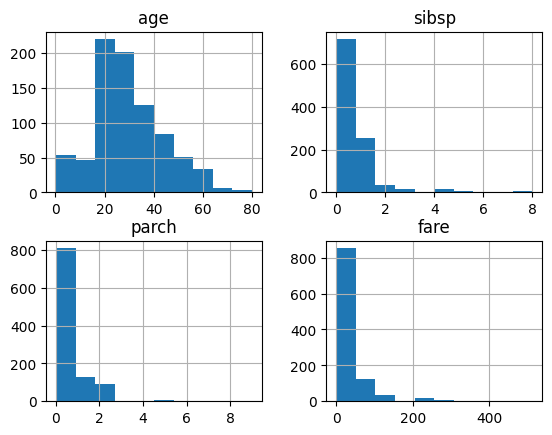

In [31]:
df_train.hist()
plt.show()

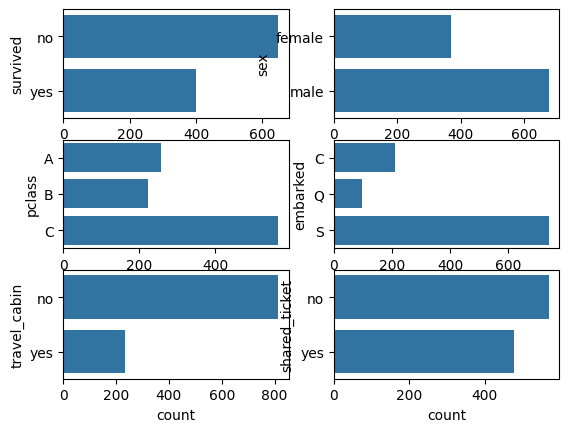

In [34]:
fig, ax = plt.subplots(3,2)
sns.countplot(data = df_train, y = 'survived', ax = ax[0,0])
sns.countplot(data = df_train, y = 'sex', ax = ax[0,1])
sns.countplot(data = df_train, y = 'pclass', ax = ax[1,0])
sns.countplot(data = df_train, y = 'embarked', ax = ax[1,1])
sns.countplot(data = df_train, y = 'travel_cabin', ax = ax[2,0])
sns.countplot(data = df_train, y = 'shared_ticket', ax = ax[2,1])

plt.show()

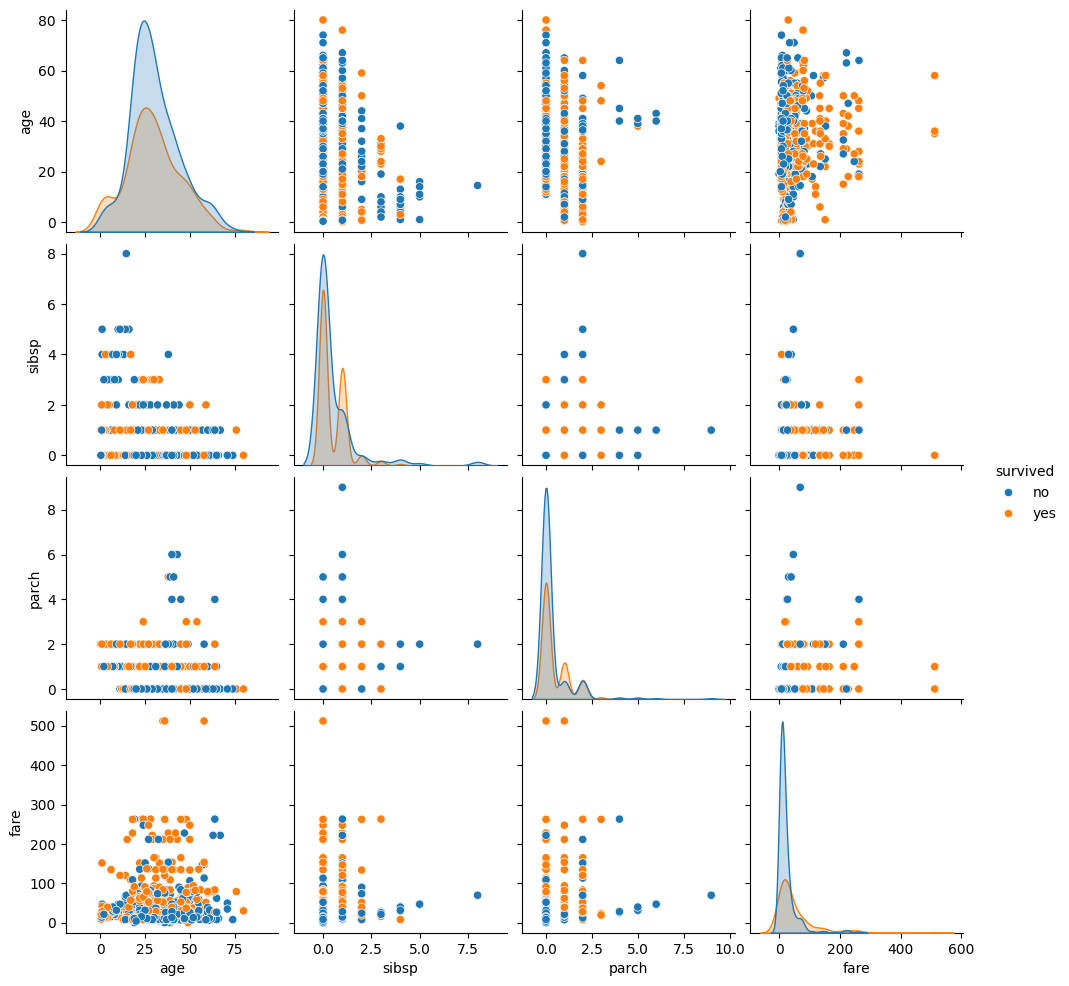

In [35]:
sns.pairplot(data = df_train, hue= 'survived') # cruza dos variables, la dependiente con cada numerica
plt.show()

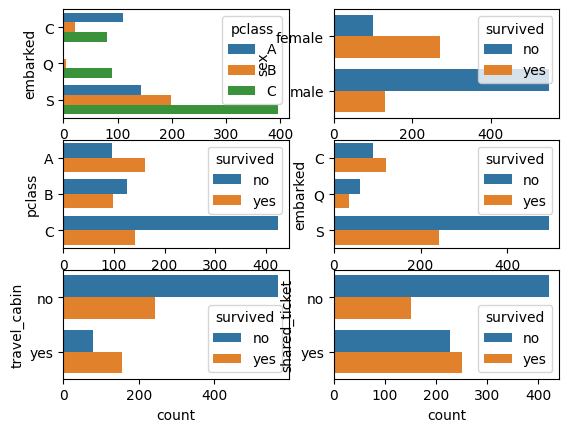

In [37]:
fig, ax = plt.subplots(3,2)
sns.countplot(data = df_train, y = 'embarked', hue='pclass', ax = ax[0,0])
sns.countplot(data = df_train, y = 'sex', hue='survived', ax = ax[0,1])
sns.countplot(data = df_train, y = 'pclass', hue='survived', ax = ax[1,0])
sns.countplot(data = df_train, y = 'embarked', hue='survived', ax = ax[1,1])
sns.countplot(data = df_train, y = 'travel_cabin', hue='survived', ax = ax[2,0])
sns.countplot(data = df_train, y = 'shared_ticket', hue='survived', ax = ax[2,1])
# correlacion de variables, correlacion no es causacion
plt.show()

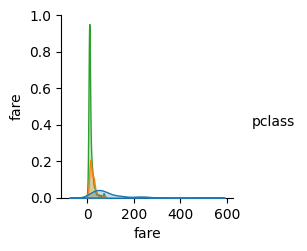

In [38]:
sns.pairplot(data=df_train[['fare','pclass']], hue='pclass')
plt.show()